In [1]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics

In [2]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
# X = iris.data
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [6]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [7]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, clf.predict(X_train)))

Train - Accuracy : 0.9523809523809523


In [8]:
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, clf.predict(X_train)))

Train - Confusion matrix : [[34  0  0]
 [ 0 30  2]
 [ 0  3 36]]


In [9]:
print ("Train - classification report :", metrics.classification_report(y_train, clf.predict(X_train)))

Train - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.91      0.94      0.92        32
           2       0.95      0.92      0.94        39

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [10]:
print ("Test - Accuracy :", metrics.accuracy_score(y_test, clf.predict(X_test)))

Test - Accuracy : 0.9777777777777777


In [11]:
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, clf.predict(X_test)))

Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [12]:
print ("Test - classification report :", metrics.classification_report(y_test, clf.predict(X_test)))

Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



***Plot Decision Boundary***

In [14]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=100,  # Number of samples
    n_features=2,   # Number of features
    n_informative=2,  # Number of informative features (features that contribute to the class separation)
    n_redundant=0,   # Number of redundant features (features generated as random linear combinations of informative features)
    weights=[0.5, 0.5],  # Class weights (in this case, balanced classes)
    random_state=0  # Random seed for reproducibility
)

# build a simple logistic regression model
clf = SVC(kernel='linear', random_state=0)
clf.fit(X, y)

SVC(kernel='linear', random_state=0)

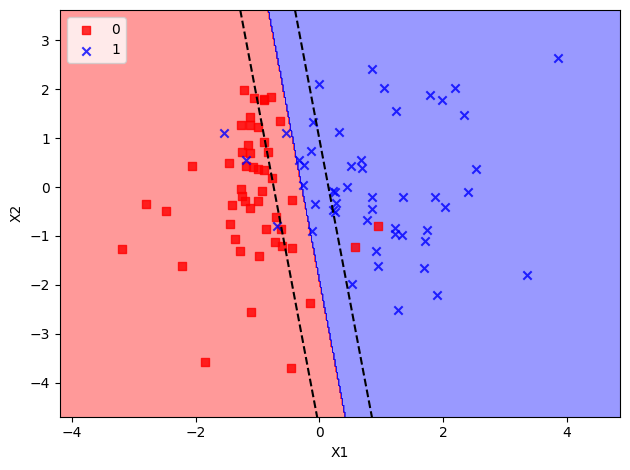

In [15]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)

# plot the line, the points, and the nearest vectors to the plane
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()